In [1]:
import ee
import geemap

# Authenticate to Earth Engine
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

import matplotlib.pyplot as plt

data_folder = "projects/amazon-forest-regrowth/assets"

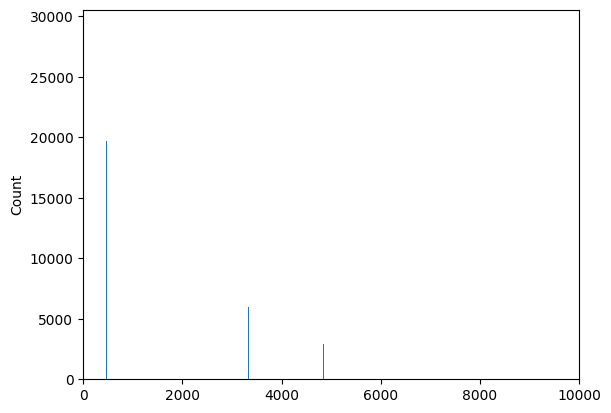

In [3]:
distance = ee.Image(f"{data_folder}/eu/distance_to_nearest_mature")

# tst = age_agbd.select('age').updateMask(land_use_15_years.select("last_LU")).updateMask(one_hectare_mask)

# 19, 24, 29
histogram_ee = distance.reduceRegion(
    geometry = distance.geometry(), reducer = ee.Reducer.histogram(), maxPixels=1e13
)

hist = histogram_ee.getInfo()

# list(hist.keys())
# Get the bin centers and bin counts
bin_centers = hist['distance']['bucketMeans']
bin_counts = hist['distance']['histogram']

# Plot the histogram
# plt.xlabel('Age')
plt.bar(bin_centers, bin_counts, width=1)
plt.xlim(0, 10000)  # Limit x-axis between 0 and 10000
plt.ylabel('Count')
# plt.title('Histogram of Ages with 5 years of land use history or less')
plt.show()
